In [11]:
import pandas as pd
import quantstats as qs
import matplotlib.pyplot as plt

# Return VS Benchmark

## เปรียบเทียบแบ่งเท่าๆกัน 100 M

<Figure size 1000x600 with 0 Axes>

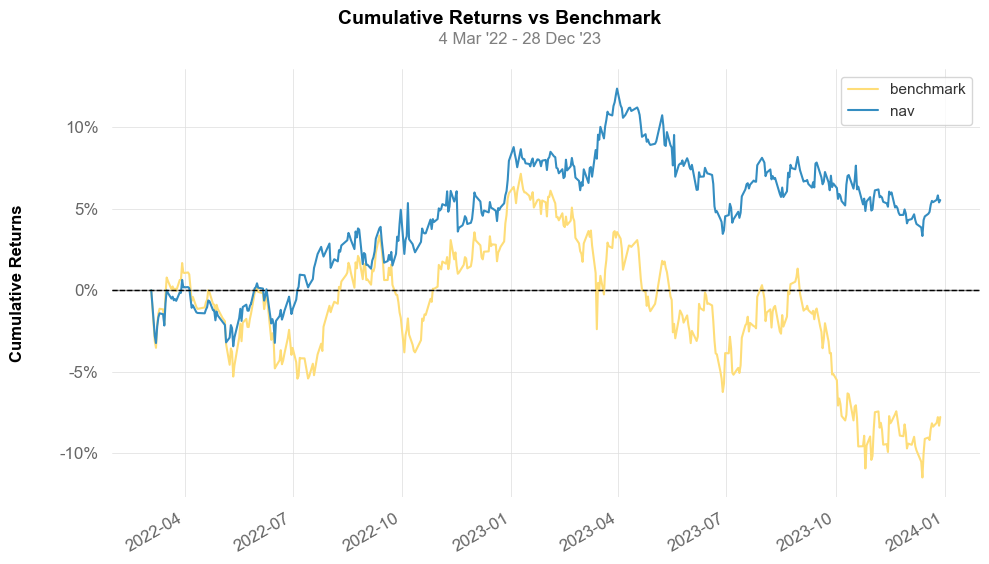

In [18]:
# อ่านข้อมูลจากไฟล์ Excel
file_path = r'C:\Users\ming\Desktop\MyJob\DSM1.1.2\history\port_trading100m.xlsx'
data = pd.read_excel(file_path)

# ลบแถวที่มีค่า NA ในคอลัมน์ 'date' หรือ 'sum_volume'
data.dropna(subset=['date', 'sum_volume'], inplace=True)

# กรองข้อมูลที่มีค่า nav, benchmark ที่ไม่เป็น 0
filtered_data = data[(data['nav'] != 0) & (data['benchmark'] != 0)]

# ลบ 20 แถวแรกออก
filtered_data = filtered_data.iloc[20:]

# ตั้งค่า index เป็น date
filtered_data.set_index('date', inplace=True)

# แปลงข้อมูลเป็น pandas.Series
nav_series = pd.Series(filtered_data['nav'], index=filtered_data.index)
benchmark_series = pd.Series(filtered_data['benchmark'], index=filtered_data.index)

# สร้างกราฟ
plt.figure(figsize=(10, 6))  # กำหนดขนาดกราฟ
qs.plots.returns(nav_series, benchmark_series)# ตั้งชื่อกราฟ
plt.show()


## เปรียบเทียบแบ่งหุ้นที่มี std สูงสุด 10 อันดับแรกได้ 60 m ที่เหลือ 40 m

<Figure size 1000x600 with 0 Axes>

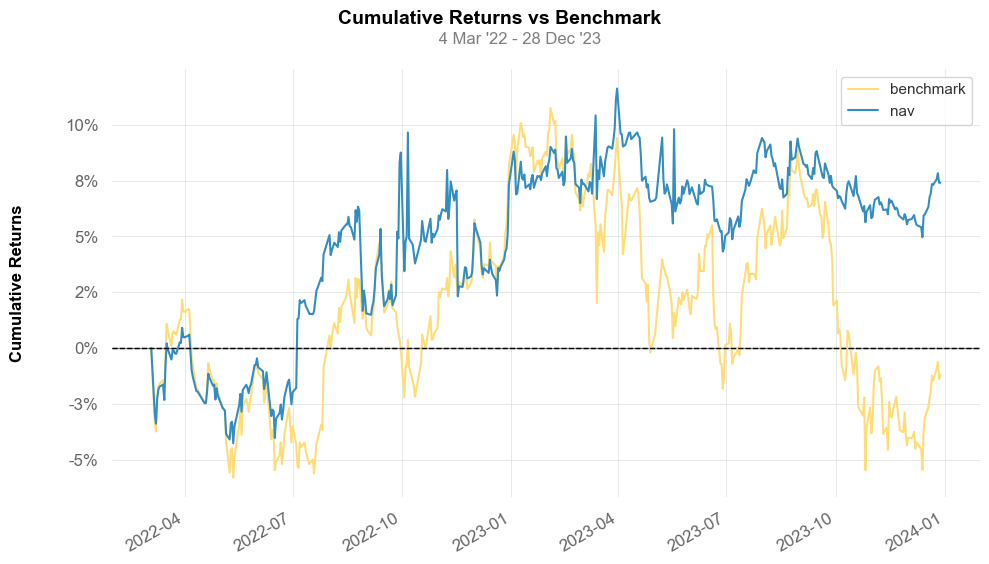

In [19]:
# อ่านข้อมูลจากไฟล์ Excel
file_path = r'C:\Users\ming\Desktop\MyJob\DSM1.1.2\history\60-40\port_trading60-40m.xlsx'
data = pd.read_excel(file_path)
# ลบแถวที่มีค่า NA ในคอลัมน์ 'date' หรือ 'sum_volume'
data.dropna(subset=['date', 'sum_volume'], inplace=True)

# กรองข้อมูลที่มีค่า nav, benchmark ที่ไม่เป็น 0
filtered_data = data[(data['nav'] != 0) & (data['benchmark'] != 0)]

# ลบ 20 แถวแรกออก
filtered_data = filtered_data.iloc[20:]

# ตั้งค่า index เป็น date
filtered_data.set_index('date', inplace=True)

# แปลงข้อมูลเป็น pandas.Series
nav_series = pd.Series(filtered_data['nav'], index=filtered_data.index)
benchmark_series = pd.Series(filtered_data['benchmark'], index=filtered_data.index)

# สร้างกราฟ
plt.figure(figsize=(10, 6))  # กำหนดขนาดกราฟ
qs.plots.returns(nav_series, benchmark_series)# ตั้งชื่อกราฟ
plt.show()



## เปรียบเทียบแบ่งหุ้นที่มี std สูงสุด 10 อันดับแรกได้ 80 m ที่เหลือ 20 m

<Figure size 1000x600 with 0 Axes>

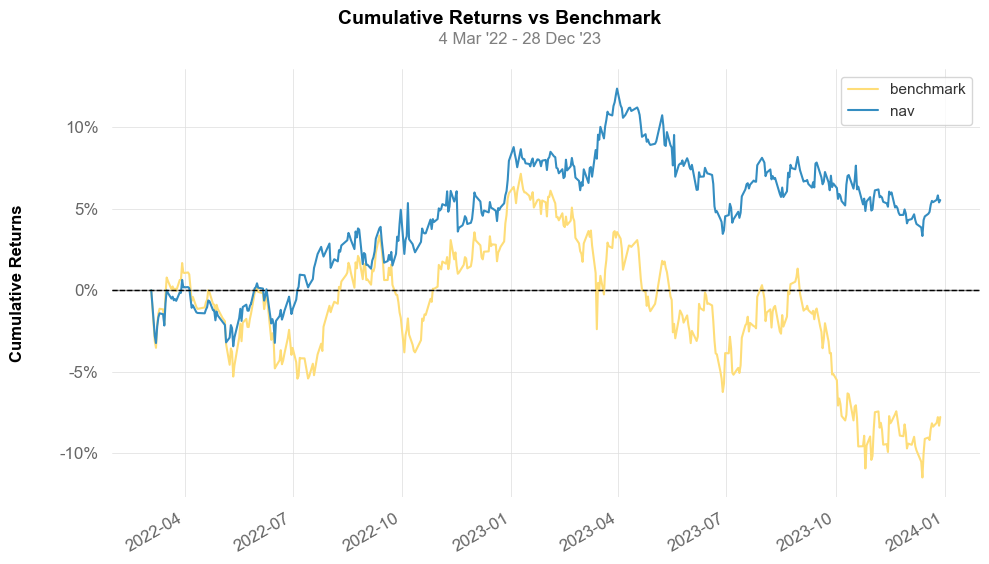

In [20]:
# อ่านข้อมูลจากไฟล์ Excel
file_path = r'C:\Users\ming\Desktop\MyJob\DSM1.1.2\history\80-20\port_trading80-20m.xlsx'

# Re-read the Excel file to start fresh
data = pd.read_excel(file_path)
# ลบแถวที่มีค่า NA ในคอลัมน์ 'date' หรือ 'sum_volume'
data.dropna(subset=['date', 'sum_volume'], inplace=True)

# กรองข้อมูลที่มีค่า nav, benchmark ที่ไม่เป็น 0
filtered_data = data[(data['nav'] != 0) & (data['benchmark'] != 0)]

# ลบ 20 แถวแรกออก
filtered_data = filtered_data.iloc[20:]

# ตั้งค่า index เป็น date
filtered_data.set_index('date', inplace=True)

# แปลงข้อมูลเป็น pandas.Series
nav_series = pd.Series(filtered_data['nav'], index=filtered_data.index)
benchmark_series = pd.Series(filtered_data['benchmark'], index=filtered_data.index)

# สร้างกราฟ
plt.figure(figsize=(10, 6))  # กำหนดขนาดกราฟ
qs.plots.returns(nav_series, benchmark_series)# ตั้งชื่อกราฟ
plt.show()



# จำนวนหุ้นที่ซื้อเพิ่มได้

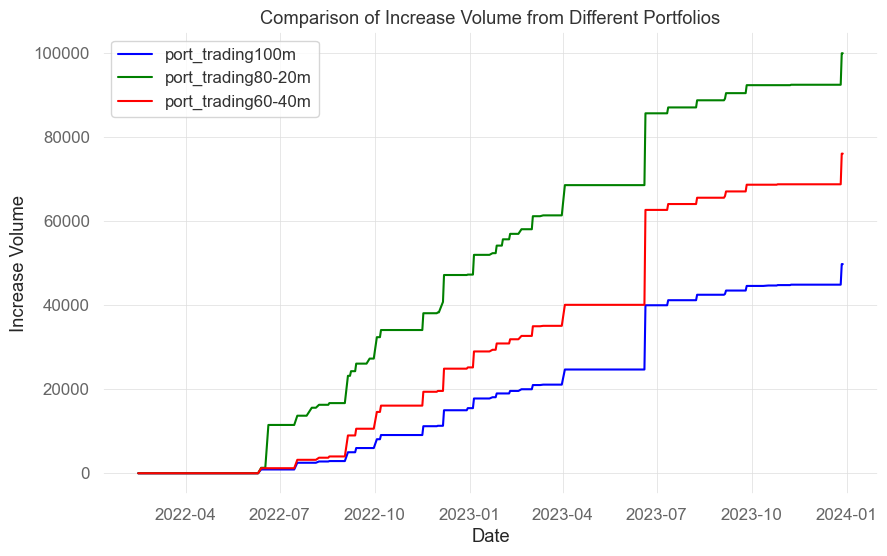

In [25]:

# Define file paths with the names corresponding to the uploaded files
file_paths = {
    'port_trading100m': r'C:\Users\ming\Desktop\MyJob\DSM1.1.2\history\port_trading100m.xlsx',
    'port_trading80-20m': r'C:\Users\ming\Desktop\MyJob\DSM1.1.2\history\80-20\port_trading80-20m.xlsx',
    'port_trading60-40m': r'C:\Users\ming\Desktop\MyJob\DSM1.1.2\history\60-40\port_trading60-40m.xlsx'
}

# Initialize a dictionary to hold the data
increase_volume_data = {}

# Define a list of colors for the plot lines
colors = ['blue', 'green', 'red']

# Loop through each file, load the data and store the 'increase_volume' column
for (name, file_path), color in zip(file_paths.items(), colors):
    data = pd.read_excel(file_path)
    
    # Drop rows with NA values in 'date' or 'increase_volume' columns
    data.dropna(subset=['date', 'increase_volume'], inplace=True)
    
    # Set the 'date' column as the index
    data.set_index('date', inplace=True)
    
    # Store the 'increase_volume' column in the dictionary with its color
    increase_volume_data[name] = {'data': data['increase_volume'], 'color': color}

# Plot each series with the specified color
plt.figure(figsize=(10, 6))
for name, details in increase_volume_data.items():
    plt.plot(details['data'].index, details['data'], label=name, color=details['color'])

plt.legend(loc='best')
plt.title('Comparison of Increase Volume from Different Portfolios')
plt.xlabel('Date')
plt.ylabel('Increase Volume')
plt.grid(True)
plt.show()

# เปรียบเทียบ cashflow

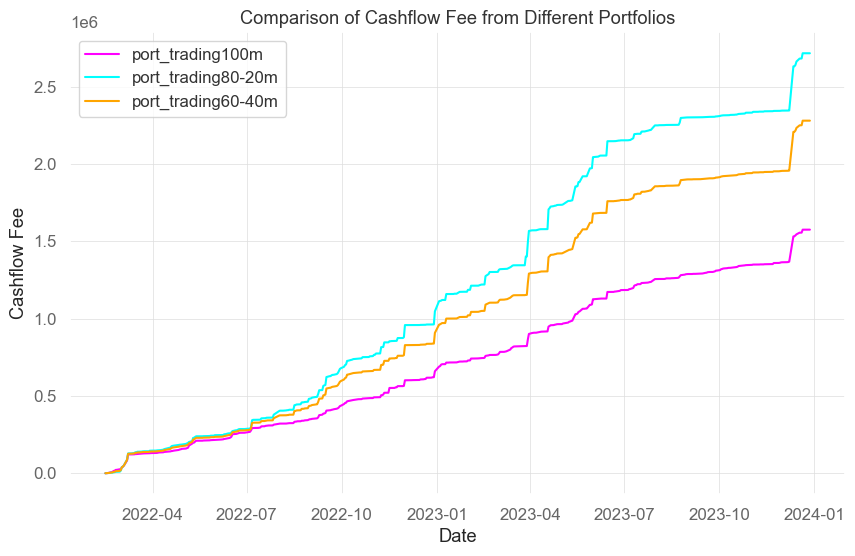

In [26]:
# Re-define the dictionary to hold the new column data
cashflow_fee_data = {}

# Define a new list of colors for the cashflow_fee plot lines
colors = ['magenta', 'cyan', 'orange']

# Loop through each file, load the data and store the 'cashflow_fee' column
for (name, file_path), color in zip(file_paths.items(), colors):
    data = pd.read_excel(file_path)
    
    # Drop rows with NA values in 'date' or 'cashflow_fee' columns
    data.dropna(subset=['date', 'cashflow_fee'], inplace=True)
    
    # Set the 'date' column as the index
    data.set_index('date', inplace=True)
    
    # Store the 'cashflow_fee' column in the dictionary with its color
    cashflow_fee_data[name] = {'data': data['cashflow_fee'], 'color': color}

# Plot each series with the specified color
plt.figure(figsize=(10, 6))
for name, details in cashflow_fee_data.items():
    plt.plot(details['data'].index, details['data'], label=name, color=details['color'])

plt.legend(loc='best')
plt.title('Comparison of Cashflow Fee from Different Portfolios')
plt.xlabel('Date')
plt.ylabel('Cashflow Fee')
plt.grid(True)
plt.show()
